In [1]:
import numpy as np
import pandas as pd
import pylab as py
import scipy.optimize as so
from scipy.fft import fft,ifft
import numpy.fft as fft
import scipy.signal as sg
import lib_optics as lib_o
import lib_m 
import sys
import os

c_m = 299792458.
pi = np.pi
radeg = (180./pi)
delta_freqGHz = 10 # GHz


n_in = 3.14
losstan_in = 1.e-4
d_m = 3e-3

index_guess = n_in
losstan_guess = losstan_in
# incident angle 
incidentangle_rad_i = 5./radeg  #   CHANGE THIS ANGLE TO REFLECT THE SETUP
incidentangle_rad_arr = np.array([incidentangle_rad_i])
incpol = 1

## Read file

In [2]:
dir_loc = '/home/julientang2001/Stage3A/'
dir_mid = 'Transmittances fits'
#filename = 'test13_0deg_1_1000Hz_Y_band_N_1001_20220713132902'
#filename = 'test13_0deg_3_1000Hz_Y_band_N_1001_20220713140000'
#filename = 'test13_90deg_1000Hz_Y_band_N_1001_20220713133512'
#filename = 'test13_180deg_1000Hz_Y_band_N_1001_20220713134050'
#filename = 'test13_270deg_1000Hz_Y_band_N_1001_20220713134556'
#filename = 'test13_360deg_1000Hz_Y_band_N_1001_20220713135123'
dir_out = dir_loc+'/Transmittances fits/'
dir_out_notched = dir_loc+'Notched Fits/'

In [3]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# define fit function
#    def func_HWPWG_alignment_model(freq_Hz, losstan_o_in, losstan_e_in, offset_in_rad):
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def read_txt3f_commma(filename):
    import fileinput
    arr1 = []
    arr2 = []
    arr3 = []
    filelines = fileinput.input(filename)
    i=0
    for line in filelines:
        print( i, line )
        ar = line.split(",")
        arr1.append(float(ar[0]))
        arr2.append(float(ar[1]))
        arr3.append(float(ar[2]))
        i+=1

    print( 'read from ' )
    print( '   ', filename )
    print( '    num= ', len(arr1) )
    return np.array(arr1), np.array(arr2), np.array(arr3)



In [4]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

dir_par = '/home/julientang2001/Stage3A/'
dir_data =  dir_par+'/Shaul202211_3dpripowderflatalumina/'

print(dir_data+'/WR22_SiPatterned0RA.csv')
filename = 'WR22_SapphireTA'

data = read_txt3f_commma(dir_data+'/WR22_SapphireTA.txt')
#data_WR34_TA_arr = read_txt3f_commma(dir_data+'/WR34_SapphireTA.txt')

# data_WR22_TB_arr = read_txt3f_commma(dir_data+'/WR22_SapphireTB.txt')

print(dir_data+'/WR22_SiPatterned0RA.csv')
# filename = 'WR22_SapphireTB'

# data = read_txt3f_commma(dir_data+'/WR22_SapphireTB.txt')
# data_WR34_TB_arr = read_txt3f_commma(dir_data+'/WR34_SapphireTB.txt')

# print(dir_data+'/WR34_SiPatterned0RA.csv')
# filename = 'WR34_SapphireTB'

# data = read_txt3f_commma(dir_data+'/WR34_SapphireTB.txt')
#data_WR51_TB_arr = read_txt3f_commma(dir_data+'/WR51_SapphireTB.txt')
#fname = '/home/julientang2001/Stage3A/Shaul202211_3dpripowderflatalumina/WR51_SapphireTA.csv'
#arr = pd.read_csv(fname,encoding="cp932",skipfooter=2,header = 6)
#freq51 = arr['Freq(Hz)']
#trans51 = arr['S11 Lin Mag(U)']
#phase51 = arr['S11 Phase(ｰ)']
#data_WR51_TA_arr = np.zeros((3,np.size(freq51)))
#data_WR51_TA_arr[0]=freq51
#data_WR51_TA_arr[1]=trans51
#data_WR51_TA_arr[2]=phase51

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


/home/julientang2001/Stage3A//Shaul202211_3dpripowderflatalumina//WR22_SiPatterned0RA.csv
0 310000000000,0.57785571,90.235855

1 310250000000,0.97946894,83.557648

2 310500000000,0.17124602,97.21209

3 310750000000,2.7134428,106.81887

4 311000000000,0.83149338,97.533127

5 311250000000,0.92350525,92.777039

6 311500000000,0.67670524,95.365776

7 311750000000,0.74975252,98.051414

8 312000000000,0.80072588,95.061005

9 312250000000,0.76551962,100.88983

10 312500000000,0.88394541,90.49794

11 312750000000,0.96922678,80.507736

12 313000000000,1.057693,74.946823

13 313250000000,0.73431796,67.877594

14 313500000000,1.0765792,69.571281

15 313750000000,0.74186784,72.294342

16 314000000000,1.0253371,69.441483

17 314250000000,0.91403413,64.099289

18 314500000000,0.96003127,58.378597

19 314750000000,0.99065477,52.592636

20 315000000000,0.86579198,47.600327

21 315250000000,0.94853258,50.268433

22 315500000000,0.97621179,42.226177

23 315750000000,0.97087836,36.788502

24 316000000000

### Curve fit

In [5]:
def func_fitTransmittance(freq_Hz, index_in, losstan_in):
    # define the array
    d_m_arr = np.array([d_m])
    index_in_arr = np.array([1.,index_in, 1.])
    losstan_in_arr = np.array([0.,losstan_in,0.])
    tx = lib_o.fit_oblique_basic_multilayer_r_t_incloss( index_in_arr, losstan_in_arr, d_m_arr, freq_Hz, incidentangle_rad_arr, incpol)
    return np.abs(tx[2])**2
#++++++++++++++++++++++++++++++++++

Text(0.5, 1.0, 'Transmittance of alumina flat disk')

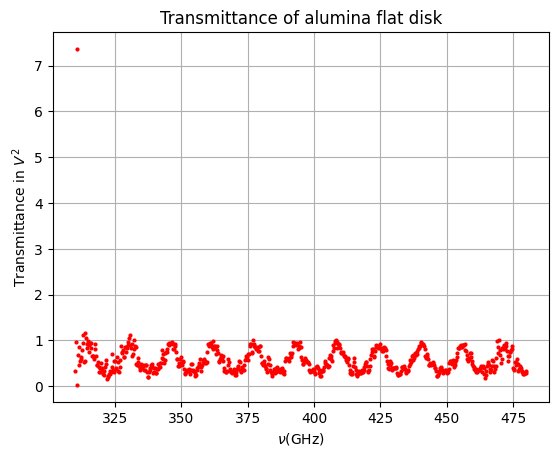

In [6]:
freqGHz_data = data[0]*1e-9
trans = data[1]**2
num_freq = len(freqGHz_data)
# han = np.hanning(num_freq)
# trans = trans1*han
sigma_in = np.ones(num_freq)*0.02
freqHz_arr = np.linspace(np.min(freqGHz_data)*1e9,np.max(freqGHz_data)*1e9,1000)

py.figure(1)

py.subplot(111)
py.plot(freqGHz_data, trans,'r.',markeredgewidth=0.00001)
py.grid()
py.xlabel(r'$\nu$(GHz)')
py.ylabel('Transmittance in $V^2$')
py.title('Transmittance of alumina flat disk')

In [7]:
print(num_freq)

681


In [8]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

popt, pcov = so.curve_fit(func_fitTransmittance, freqGHz_data*1e9, trans, sigma=sigma_in, p0=np.array([index_guess, losstan_guess]), bounds=([index_guess-1., 0.],[index_guess+1, 1e-2]) ) 
perr = np.sqrt(np.diag(pcov))

print()
print('-------------------------------------------------------------------------------')
print('WR22_SapphireTA_TransFit_v01.py')
print(dir_loc+dir_mid)
print(' -- ',filename,' -- ')
print('initial input parameters: loss-o, loss-e, angle [deg]', index_guess, losstan_guess)
print('fit parameters, index: ', popt[0], '+/-', perr[0])
print('fit parameters, losstan: ', popt[1], '+/-', perr[1])
print('thickness:', d_m*1e3, '[mm]')



trans_fit = func_fitTransmittance(freqHz_arr, popt[0], popt[1]) 
trans_fit4res = func_fitTransmittance(freqGHz_data*1e9, popt[0], popt[1]) 
rechisq = 1./(num_freq-2.) * np.sum( (trans-trans_fit4res)**2/sigma_in**2 )
print('chisq =', rechisq)
print('-------------------------------------------------------------------------------')
print()
res = trans-trans_fit4res
res_fft = lib_m.calPSD(res,delta_freqGHz,6)
print(np.shape(trans_fit4res))
print(np.shape(res_fft))
print(np.shape(freqGHz_data)) 

f_c = .9






-------------------------------------------------------------------------------
WR22_SapphireTA_TransFit_v01.py
/home/julientang2001/Stage3A/Transmittances fits
 --  WR22_SapphireTA  -- 
initial input parameters: loss-o, loss-e, angle [deg] 3.14 0.0001
fit parameters, index:  3.179516770243461 +/- 0.0009173149786543219
fit parameters, losstan:  0.0004590112615578068 +/- 0.00017211505719691775
thickness: 3.0 [mm]
chisq = 198.3540163417772
-------------------------------------------------------------------------------

(681,)
(2, 341)
(681,)


In [9]:
print(trans_fit.shape)

(1000,)


In [10]:
i_arr = np.where(trans_fit>0.927)
print(i_arr[0])
print(trans_fit[i_arr])

[ 23  24  25  26  27  28  29 116 117 118 119 120 121 208 209 210 211 212
 213 301 302 303 304 305 393 394 395 396 397 398 486 487 488 489 490 579
 580 581 582 671 672 673 674 764 765 766 857 858 950]
[0.93300049 0.94317261 0.94927564 0.95111919 0.94864485 0.94193067
 0.93118514 0.93744829 0.94509783 0.9485662  0.94774423 0.94265777
 0.93346572 0.93119032 0.94033684 0.94539803 0.94621592 0.9427646
 0.93515225 0.9350124  0.94162768 0.94406545 0.94224909 0.93623554
 0.9291464  0.93727071 0.94130119 0.94111205 0.9367091  0.92822937
 0.93234513 0.93793427 0.93935718 0.9365692  0.92965729 0.93397845
 0.93699101 0.93581492 0.9304868  0.92945001 0.93402285 0.93444818
 0.9307126  0.93046466 0.93247372 0.93033209 0.92989902 0.92934549
 0.92775577]


In [11]:
xx = res_fft[0]

In [12]:
x1,y1 = freqHz_arr[26]*1e-9,trans_fit[26] 
x2,y2 = freqHz_arr[950]*1e-9,trans_fit[950] 
alpha = (y2-y1)/(x2-x1)
print(alpha)

-0.00014858707165723228


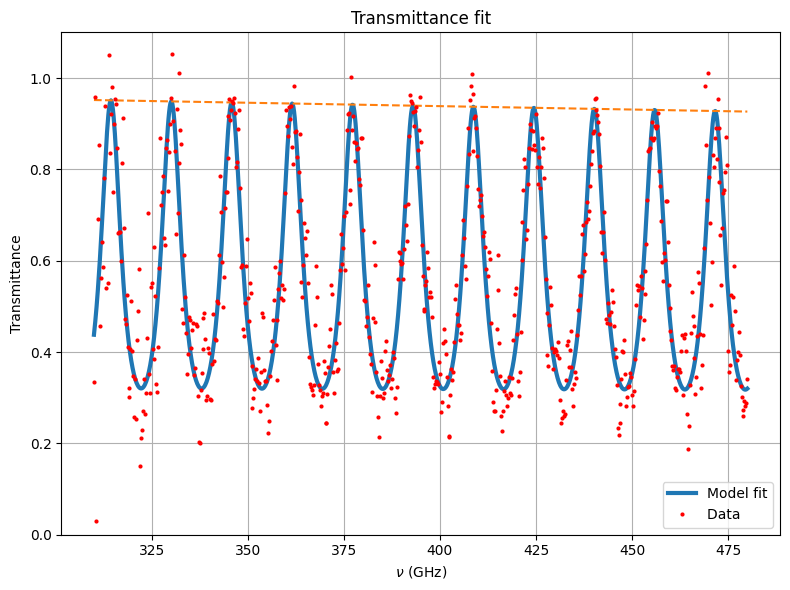

In [13]:

# Create the figure and subplots
# fig, (ax1, ax2) = py.subplots(2, 1, figsize=(8, 6))
fig,ax1 = py.subplots(1, 1, figsize=(8, 6))
ax1.set_title('Transmittance fit')
# Plot on the first subplot
ax1.plot(freqHz_arr*1e-9, trans_fit,label = 'Model fit', linewidth = 3)
ax1.plot(freqHz_arr*1e-9,alpha*(freqHz_arr*1e-9-x1)+y1,'--')
ax1.plot(freqGHz_data,trans,"r.",label = 'Data ',markeredgewidth=0.0001 )
ax1.set_xlabel(r'$\nu$ (GHz)')
ax1.set_ylabel('Transmittance')
ax1.set_ybound((0.,1.1))
ax1.grid()
ax1.legend()

# Plot on the second subplot
# ax2.plot(res_fft[0],res_fft[1], label = 'Residuals PSD', linewidth =.8)
# ax2.set_xlabel('$\dfrac{1}{\\nu}$')
# ax2.set_ylabel('PSD')
# ax2.set_ybound((0.,0.5))
# ax2.grid()
# ax2.legend()
# ax2.set_title('Residuals PSD')

# Adjust spacing between subplots
py.tight_layout()

# # Show the plot
# py.savefig(dir_out+'/PNG_fit_pert_index_losstan_'+filename+'.png')
py.show()

# np.savez(dir_out+'/fitout_pert_arr_filename.npz',popt,perr,rechisq,data,sigma_in)

In [14]:
def resul(opt,cov):
    ind0 = opt[0]
    tan0 = opt[1]
    dif = np.sqrt(np.diag(cov))
    return(np.array([ind0,tan0,dif[0],dif[1]]))

In [15]:
def RMS_res(data,fit):
    res= data-fit
    return(np.sqrt(np.mean(res**2)))

In [16]:
def ecretage(t,u,cutoff ,samplerate):
    n = len(t)
    cut = int(2*cutoff*(len(t)+1)/samplerate)
    if cut > n:
         cut =n
    sig = np.sqrt(np.var(t))
    m = np.mean(t)
    ecretage = np.zeros(n)
    lower_bound = m - u*sig
    upper_bound = m+u*sig
    for i in range(0,cut):
        if t[i] >= lower_bound and t[i] <= upper_bound:
                ecretage[i] =t[i]            
    return (ecretage)

In [17]:
power_fit = lib_m.calPSD(trans_fit4res,samplerate=delta_freqGHz,outputunit=6)

<function matplotlib.pyplot.show(close=None, block=None)>

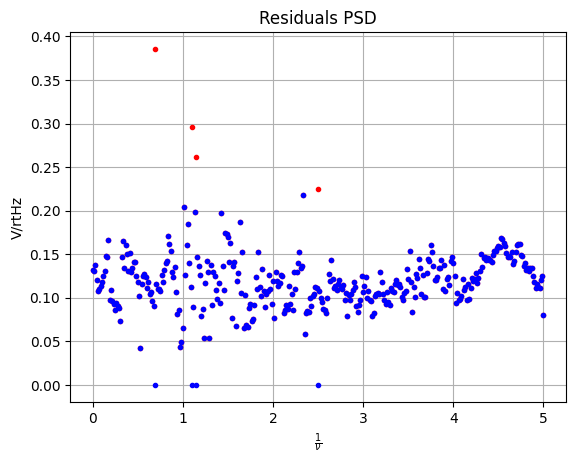

In [61]:
py.plot(res_fft[0],res_fft[1],'r.')
py.plot(res_fft[0],ecretage(res_fft[1],3,cutoff=5,samplerate=delta_freqGHz),'b.')
# py.plot(power_fit[0],power_fit[1]*np.max(res_fft[1])/np.max(power_fit[1]),'k--', linewidth = 1)
py.xlabel(r'$\frac{1}{\nu}$')
py.ylabel(r'V/rtHz')
py.grid()
py.title('Residuals PSD')
py.show


In [19]:
trans_fft_ang = np.angle(np.fft.fft(trans))


In [20]:
resonances = res_fft[1]-ecretage(res_fft[1],u = 3, cutoff = 100,samplerate=delta_freqGHz)

In [21]:
filt_zeros = np.array([(resonance !=0) for resonance in resonances])
print(filt_zeros)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [22]:
poles = np.where(filt_zeros)
poles = np.delete(poles,2)
print(poles)

[ 47  75 170]


In [23]:
print(xx.shape)

(341,)


In [24]:
freq_filt_zeros_arr =xx[poles]
print(freq_filt_zeros_arr)
f1,f2,f3 = freq_filt_zeros_arr

[0.69117647 1.10294118 2.5       ]


In [25]:
phi_resonance = trans_fft_ang[poles]
print(phi_resonance)
phi1,phi2,phi3 = phi_resonance

[-0.70665225 -2.15052095  1.52017961]


In [26]:
amp_resonance = res_fft[1][poles]
print(amp_resonance)

[0.38551538 0.29545889 0.22525479]


In [27]:
oscillation_arr_amp = np.zeros(xx.shape)
oscillation_arr_amp[poles] = amp_resonance
print(oscillation_arr_amp)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.38551538
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.29545889 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [50]:
def fit_oscillation(freq_Hz, a1,a2,a3):
    #amplitude
    x1,x2,x3 = a1,a2,a3
    return x1*np.cos(f1*1e-9*freq_Hz+phi1)+x2*np.cos(f2*1e-9*freq_Hz+phi2)+x3*np.cos(f3*1e-9*freq_Hz+phi3)
#++++++++++++++++++++++++++++++++++

In [48]:
print(freqGHz_data)

[310.   310.25 310.5  310.75 311.   311.25 311.5  311.75 312.   312.25
 312.5  312.75 313.   313.25 313.5  313.75 314.   314.25 314.5  314.75
 315.   315.25 315.5  315.75 316.   316.25 316.5  316.75 317.   317.25
 317.5  317.75 318.   318.25 318.5  318.75 319.   319.25 319.5  319.75
 320.   320.25 320.5  320.75 321.   321.25 321.5  321.75 322.   322.25
 322.5  322.75 323.   323.25 323.5  323.75 324.   324.25 324.5  324.75
 325.   325.25 325.5  325.75 326.   326.25 326.5  326.75 327.   327.25
 327.5  327.75 328.   328.25 328.5  328.75 329.   329.25 329.5  329.75
 330.   330.25 330.5  330.75 331.   331.25 331.5  331.75 332.   332.25
 332.5  332.75 333.   333.25 333.5  333.75 334.   334.25 334.5  334.75
 335.   335.25 335.5  335.75 336.   336.25 336.5  336.75 337.   337.25
 337.5  337.75 338.   338.25 338.5  338.75 339.   339.25 339.5  339.75
 340.   340.25 340.5  340.75 341.   341.25 341.5  341.75 342.   342.25
 342.5  342.75 343.   343.25 343.5  343.75 344.   344.25 344.5  344.75
 345. 

In [49]:
print(f1,f2,f3)

0.6911764705882353 1.1029411764705883 2.5


In [51]:
def func_fitTransmittance_osci(freq_Hz, index_in, losstan_in,a1,a2,a3):
    transmittance_arr = func_fitTransmittance(freq_Hz,index_in,losstan_in)
    transmittance_osc = fit_oscillation(freq_Hz,a1,a2,a3)
    return transmittance_arr+transmittance_osc
#++++++++++++++++++++++++++++++++++

### Notch filter

(3, 2, 3)
(3, 2, 341)
(341,)


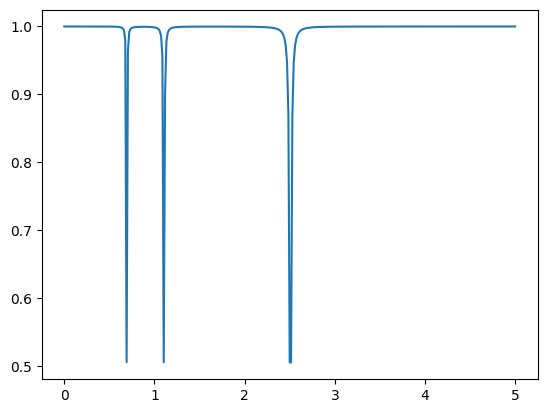

0.5059025068306827


In [30]:
def create_notch_filter(freq_arr, Q,fs):
    b, a = sg.iirnotch(freq_arr,Q,fs=fs)
    return b, a
filt_notch_ba = np.array([sg.iirnotch(freq,Q=100,fs=10) for freq in freq_filt_zeros_arr])
print(filt_notch_ba.shape)
filt_notch_resp = np.array([sg.freqz(b,a,worN=len(xx),fs=10) for (b,a) in filt_notch_ba])
print(filt_notch_resp.shape)
# for i in range(0,4):
#     py.plot(filt_notch_resp[i][0],np.abs(filt_notch_resp[i][1]))
# py.show()
filt_total = np.array([np.prod(filt_notch_resp[:,1,i]) for i in range(0,len(xx)) ])
print(filt_total.shape)
# for i in range(0,4):
#     py.plot(filt_notch_resp[i][0],np.abs(filt_notch_resp[i][1]))
py.plot(xx,np.abs(filt_total))
py.show()
print(np.min(np.abs(filt_total)))


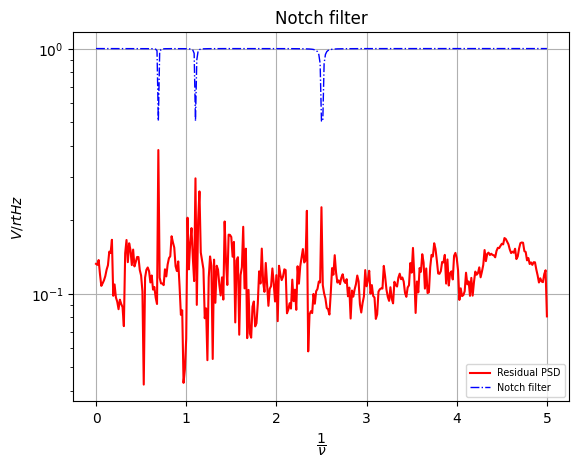

In [31]:
py.figure(1)
ax1 = py.subplot(111)
ax1.plot(xx,res_fft[1],'r', label = 'Residual PSD')
# ax1.plot(xx,lib_m.calPSD(trans_fit4res,samplerate=delta_freqGHz,outputunit=6)[1],'k--',label = 'Fit model PSD',linewidth = 1)
ax1.plot(xx,np.abs(filt_total),'b-.',label = 'Notch filter',linewidth=1)
handles, labels = ax1.get_legend_handles_labels()
py.grid()
py.xlabel('$\dfrac{1}{\\nu}$')
py.ylabel('$V/rtHz$')
# py.ylim(0,1)
py.yscale('log')
# py.xscale('log')

py.legend(handles,labels, loc = 'best', fontsize = 'x-small')
py.title('Notch filter')
py.show()

# Filtering the transmittance data

In [32]:
trans_psd = lib_m.calPSD(trans,samplerate=delta_freqGHz,outputunit=6)
trans_psd_filt = np.abs(filt_total)**2*trans_psd[1]

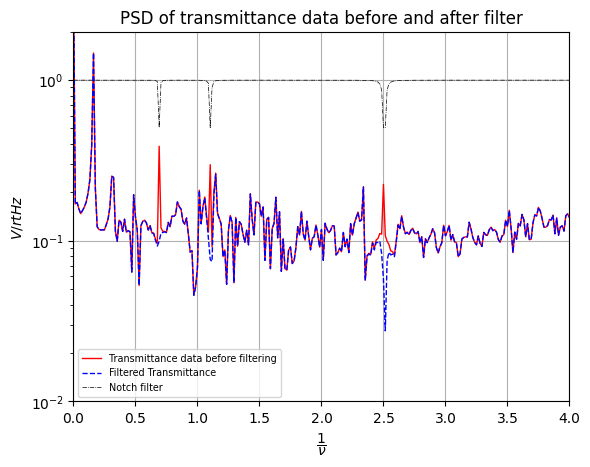

In [33]:
py.figure(1)
ax1 = py.subplot(111)
ax1.plot(trans_psd[0],trans_psd[1],'r-',label = 'Transmittance data before filtering',linewidth = 1)
ax1.plot(trans_psd[0],trans_psd_filt,'b--',label = 'Filtered Transmittance',linewidth=1)
ax1.plot(xx,np.abs(filt_total),'k-.',label = 'Notch filter',linewidth=0.5)

handles, labels = ax1.get_legend_handles_labels()
py.grid()
py.xlabel('$\dfrac{1}{\\nu}$')
py.ylabel('$V/rtHz$')
py.ylim(1e-2,2)
py.xlim(0,4)

py.yscale('log')
# py.xscale('log')

py.legend(handles,labels, loc = 'best', fontsize = 'x-small')
py.title('PSD of transmittance data before and after filter')
py.show()

# from PSD back to data

### Filter

In [34]:
def inv_calPSD(PSD0, samplerate, outputunit):
    """ this program calculate the power spectrum density [V/rtHz]
        caution!  Normalization for k=1,...N/2-1 and k=0&nyquist is 
        is different by factor of sqrt(2)
        
        output unit
        1: sum squared amplitude K^2 (NRC 13.4.1)
        2: mean squared amplitude K^2/nbData (NRC 13.4.2)
        3: time integral squared amplitude K^2 sec (NRC 13.4.3)
        4: sqrt of 1
        5: sqrt of 2
        6: sqrt of 3
        7: normalized to 1 using the average of first 5 data points at low freq
        unit is still in K, not K^2
    """
    nrowh = len(PSD0)-1
    nbData = 2*nrowh+1
    delta = 1./samplerate
    N = np.double(nbData)
    Ck = np.zeros(nbData)
    if (outputunit == 1): 
        psd = PSD0/N
    if (outputunit == 2): 
        psd = PSD0
    if (outputunit == 3): 
        psd = PSD0/(delta*N)
        
    if (outputunit == 4):
        psd = PSD0**2/N
    if (outputunit == 5): 
        psd = PSD0**2
    if (outputunit == 6):
        psd = (PSD0**2)/(delta*N)
    
    psd = psd*np.double(N**2.)
#; inverse FT, direction=1, does not include normalization
#; same as (NRC-13.4.4)
    for i in range(1,nrowh): #i=1L, nrowh-1L do begin
        Ck[i] = np.sqrt(psd[i])/np.sqrt(2)
        Ck[nbData- i]= Ck[i]
    Ck[0] = np.sqrt(psd[0])
    Ck[nrowh] = np.sqrt(psd[nrowh])
    Ck[nrowh+1] = Ck[nrowh]


       
    # Ck = abs(fft.fft(datain))
        
    # freq = np.arange(0,nrowh+1)/np.double(nrowh)*samplerate/2.
    
   

    # # if (outputunit == 7): PSD = np.sqrt(PSD)/mean(np.sqrt(PSD[0:4]))
  
    return Ck


In [35]:
def recov_ifft(amp,phi):
    return (ifft(np.multiply(amp,np.exp(1j*phi))))

### Transmittance oscillation

In [36]:
oscillation_arr_data = recov_ifft(inv_calPSD(oscillation_arr_amp,delta_freqGHz,6),trans_fft_ang)
print(oscillation_arr_data)

[ 2.44627740e-02-2.08676281e-17j  3.07434350e-02-4.21835841e-18j
  9.95567863e-02-9.78170066e-18j  1.43771511e-01-1.30422675e-18j
  7.77251380e-02+7.17324715e-18j -1.82389871e-02-3.13014421e-17j
 -4.46782915e-02-2.21718548e-17j -5.25357440e-02+1.82591746e-17j
 -1.07848456e-01-5.21690702e-18j -1.34510887e-01-1.04338140e-17j
 -5.83121483e-02-3.39098956e-17j  3.30339032e-02-1.30422675e-17j
  3.91085542e-02-3.91268026e-17j  1.86751178e-02-1.17380408e-17j
  5.26600578e-02+1.56507211e-17j  7.83478059e-02+5.21690702e-18j
  2.50059060e-02+1.95634013e-17j -2.68815502e-02+4.04310294e-17j
  9.48017095e-03-1.31237817e-17j  5.93817031e-02+6.52113377e-18j
  2.86997238e-02-2.47803083e-17j -2.29437258e-02-2.08676281e-17j
 -1.44832022e-02+3.91268026e-18j -8.44150209e-03+4.56479364e-18j
 -7.54042559e-02+5.21690702e-18j -1.31423452e-01-1.04338140e-17j
 -8.18408857e-02+7.82536053e-18j  4.40107947e-03+3.91268026e-18j
  2.98377578e-02-4.69521632e-17j  4.24671748e-02-5.21690702e-18j
  1.08341869e-01-4.173525

# From PSD back to data

In [37]:
amp_guess1,amp_guess2,amp_guess3 = amp_resonance

In [38]:
p0 = np.array([index_guess,losstan_guess,amp_guess1,amp_guess2,amp_guess3])

In [58]:
# trans_filt_amp = inv_calPSD(trans_psd_filt,samplerate = delta_freqGHz, outputunit = 6)
# trans_filt = recov_ifft(trans_filt_amp,trans_fft_ang) 
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
trans_filt = trans
popt_filt, pcov_filt= so.curve_fit(func_fitTransmittance_osci, freqGHz_data*1e9, trans_filt, sigma=sigma_in, p0 = np.array([index_guess,losstan_guess,amp_guess1,amp_guess2,amp_guess3]), bounds=([index_guess-1., 0.,0,0,0],[index_guess+1, 1e-2,1,1,1]) ) 
perr_filt = np.sqrt(np.diag(pcov_filt))

print()
print('-------------------------------------------------------------------------------')
print('WR22_SapphireTA_TransFit_v01.py')
print(dir_loc+dir_mid)
print(' -- ',filename,' -- ')
print('initial input parameters: loss-o, loss-e, angle [deg]', index_guess, losstan_guess)
print('fit parameters, index: ', popt_filt[0], '+/-', perr_filt[0])
print('fit parameters, losstan: ', popt_filt[1], '+/-', perr_filt[1])
print('fit parameters, A1: ', popt_filt[2], '+/-', perr_filt[2])
print('fit parameters, A2 ', popt_filt[3], '+/-', perr_filt[3])
print('fit parameters, A3 ', popt_filt[4], '+/-', perr_filt[4])

print('thickness:', d_m*1e3, '[mm]')
trans_filt_fit = func_fitTransmittance_osci(freqHz_arr, popt_filt[0], popt_filt[1],popt_filt[2],popt_filt[3],popt_filt[4]) 
trans_filt_fit4res = func_fitTransmittance_osci(freqGHz_data*1e9, popt_filt[0], popt_filt[1],popt_filt[2],popt_filt[3],popt_filt[4]) 
rechisq_filt = 1./(num_freq-2.) * np.sum( (trans_filt-trans_filt_fit4res)**2/sigma_in**2 )
print('chisq'+str(rechisq_filt))
print('-------------------------------------------------------------------------------')



-------------------------------------------------------------------------------
WR22_SapphireTA_TransFit_v01.py
/home/julientang2001/Stage3A/Transmittances fits
 --  WR22_SapphireTA  -- 
initial input parameters: loss-o, loss-e, angle [deg] 3.14 0.0001
fit parameters, index:  3.1795415698047815 +/- 0.0009177718280980135
fit parameters, losstan:  0.0004588377378512847 +/- 0.00017215821100333612
fit parameters, A1:  0.01759015946286638 +/- 0.01524122766415504
fit parameters, A2  0.008156902884656219 +/- 0.015300219177286332
fit parameters, A3  0.015873660716506064 +/- 0.015275988326691482
thickness: 3.0 [mm]
chisq197.56295553096226
-------------------------------------------------------------------------------


In [53]:
print('fit parameters, A1: ', popt_filt[2], '+/-', perr_filt[2])
print('fit parameters, A2 ', popt_filt[3], '+/-', perr_filt[3])
print('fit parameters, A3 ', popt_filt[4], '+/-', perr_filt[4])


fit parameters, A1:  0.01759015946286638 +/- 0.01524122766415504
fit parameters, A2  0.008156902884656219 +/- 0.015300219177286332
fit parameters, A3  0.015873660716506064 +/- 0.015275988326691482


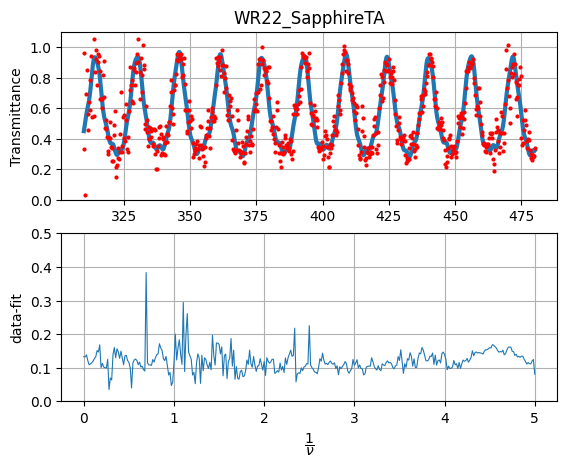

In [57]:
# trans_filt_fit = func_fitTransmittance(freqHz_arr, popt_filt[0], popt_filt[1]) 
# trans_filt_fit4res = func_fitTransmittance(freqGHz_data*1e9, popt_filt[0], popt_filt[1]) 
# rechisq_filt = 1./(num_freq-2.) * np.sum( (trans_filt-trans_filt_fit4res)**2/sigma_in**2 )
# print(r'$\chi^2$'+str(rechisq_filt))
# print('-------------------------------------------------------------------------------')
# print()
res_filt = trans_filt-trans_filt_fit4res
res_filt_fft = lib_m.calPSD(res_filt,delta_freqGHz,6)
# # print(np.shape(trans_fit4res))
# # print(np.shape(res_fft))
# # print(np.shape(freqGHz_data)) 

f_c = .9

py.figure(2)

py.subplot(211)
py.plot(freqHz_arr*1e-9, trans_filt_fit, linewidth = 3)

py.plot(freqGHz_data,trans_filt,"r.",markeredgewidth=0.0001 )
py.ylim([0.,1.1])
py.grid()
py.ylabel('Transmittance')
py.title(filename)

py.subplot(212)

py.plot(res_filt_fft[0],res_filt_fft[1], linewidth =.8)

py.ylim([0,0.5])
py.grid()
py.ylabel('data-fit')
py.xlabel('$\dfrac{1}{\\nu}$')
#py.text(np.min(freqGHz_data),-0.05, 'index, $\\tan{\\delta}$, $red. \\chi^2$, rms='+'{:1.2e}'.format(np.std(trans - trans_fit4res) ))
#py.text(np.min(freqGHz_data),-0.07, '{:1.2e}'.format(popt[0])+', '+ '{:1.3f}'.format(popt[1])+', '+ '{:1.3f}'.format(rechisq))
#py.text(np.min(freqGHz_data),-0.09, '{:1.2e}'.format(perr[0])+', '+ '{:1.3f}'.format(perr[1]))
# for i in range (1,int(6/f_c)):
#     py.axvline(i*f_c, color='r', linestyle = '--')

py.savefig(dir_out+'/PNG_fit_pert_index_losstan_'+filename+'.png')
py.show()


<Figure size 640x480 with 0 Axes>

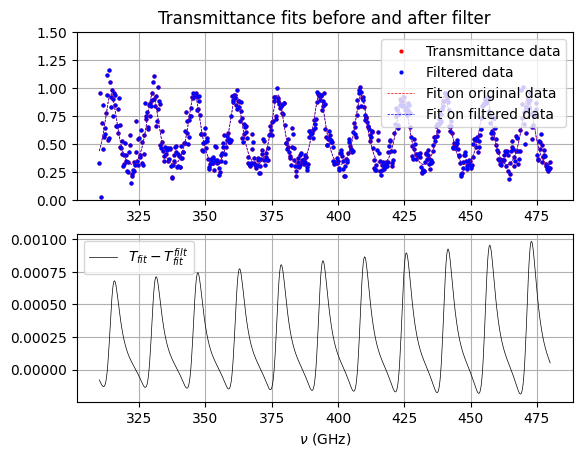

In [41]:
py.figure(1)




py.show()

py.figure(2)

ax0 = py.subplot(211)
py.title('Transmittance fits before and after filter')

ax0.plot(freqGHz_data, trans,'r.',label = 'Transmittance data',markeredgewidth = 1e-4)
ax0.plot(freqGHz_data, trans_filt,'b.',label ='Filtered data',markeredgewidth = 1e-4)
ax0.plot(freqGHz_data, trans_fit4res,'r--',label = 'Fit on original data',linewidth =.5)
ax0.plot(freqGHz_data, trans_filt_fit4res,'b--',label = 'Fit on filtered data',linewidth =.5)
# handles0, labels0 = ax0.get_legend_handles_labels()
ax0.legend()
ax0.set_ylim(0,1.5)
ax0.grid()
axlow = py.subplot(212)
axlow = py.subplot(212)

axlow.plot(freqGHz_data, trans_filt_fit4res-trans_fit4res,'k-',label = r'$T_{fit}-T_{fit}^{filt}$',linewidth =.5)
# py.yscale('log')
# py.ylim(1e-1,1.5)
axlow.grid()
axlow.legend()
py.xlabel('$\\nu$ (GHz)')
# py.legend(handles0,labels0, loc = 'best', fontsize = 'x-small')
py.show()

In [42]:
A = np.zeros((3,4,7))
print(A)
B = A.reshape(-1)
print(B)

[[[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [43]:
def oscillation(cutoff,u=55,psd=res_fft[1],angle=trans_fft_ang,samplerate=delta_freqGHz,uni=6):
    psd2 = ecretage(psd,u,cutoff,samplerate)
    Ck = inv_calPSD(PSD0=psd,samplerate=samplerate,outputunit=uni)
    Ck2 = inv_calPSD(PSD0=psd2,samplerate=samplerate,outputunit=uni)
    d = recov_ifft(Ck,angle)
    d2 = recov_ifft(Ck2,angle)
    return(d-d2)

In [44]:
osc = oscillation(cutoff=2)
print(osc.shape)


(681,)


NameError: name 'res_filt_sig' is not defined

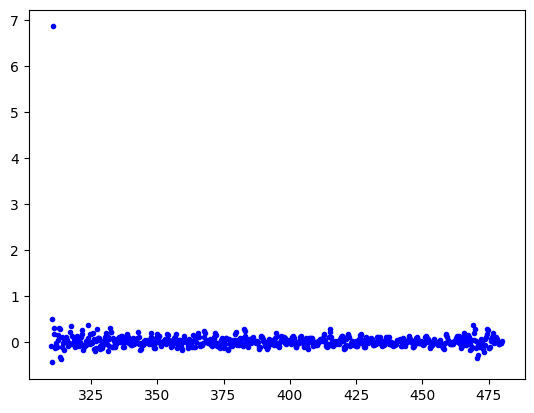

In [45]:
py.plot(freqGHz_data, res,'b.', linewidth = 1)
py.plot(freqGHz_data,  res_filt_sig,'r', linewidth = 0.2)
py.ylim(0,3)
py.show()

In [ ]:
# oscillation = res-res_filt_sig
# py.plot(freqGHz_data,oscillation)
py.plot(freqGHz_data,osc,'r-.')
py.show()

In [ ]:
# print(oscillation.shape)
print(trans.shape)

In [ ]:
def trans_notched(cut):
    return(trans-oscillation(cut))

In [ ]:
u_arr = np.linspace(0.7,2.7,1000)


In [ ]:
print(round(1.001,2))

In [ ]:
num = 1.001
rounded_num = round(num, 2)
formatted_num = "{:.2f}".format(rounded_num)

print(formatted_num)

In [ ]:
temp = np.zeros(len(trans))
Fit_filename = 'Data notched at $t_0=$'
opt_temp,cov_temp = popt,pcov
RMS0 = RMS_res(trans,trans_fit4res)
count = 0 
for u in u_arr:
    formatted_u = "{:.3f}".format(round(u,3))
    temp = trans_notched(u)
    opt_temp, cov_temp = so.curve_fit(func_fitTransmittance, freqGHz_data*1e9, temp, sigma=sigma_in, p0=popt, bounds=([index_guess-1., 0.],[index_guess+1, 1e-2]) ) 
    fit4res = func_fitTransmittance(freqGHz_data*1e9,opt_temp[0],opt_temp[1])
    res_n = temp-fit4res
    # np.savez(dir_out_notched+'notched_data_at_t0_'+str(u)+'.npz',temp,fit4res)
    fig,[ax1,ax2] = py.subplots(2,1,sharex = True)
    trans_f = ax1.plot(freqGHz_data, fit4res,'k',label = 'fitted transmittance',
                        linewidth = 2)
    data_r = ax1.plot(freqGHz_data,trans,"b-.",label = 'Raw data', 
                      linewidth = 0.5)
    data_n = ax1.plot(freqGHz_data,temp,"r-.",label = 'Notched data',
                      linewidth = 0.5 )
    # ax1.legend([trans_f],['fitted transmittance'])
    # ax1.legend([data_r],['Raw data'])
    # ax1.legend([data_n],['Notched data'])
    ax1.set_ylim([0.,1.5])
    ax1.set_ylabel('Transmittance')
    ax1.grid(True)
    ax1.set_title(Fit_filename+formatted_u+'ns')
    res_raw=ax2.plot(freqGHz_data,res,"b-",label = 'Raw residual',
                     linewidth = 0.4)
    res_notched=ax2.plot(freqGHz_data,res_n,"r-.",label = 'Notched residual',
                         linewidth = 0.4)
    ax2.set_ylim([-0.5,0.5])
    ax2.text(freqGHz_data[len(freqGHz_data)//4], 0.3, "raw rms="+str(round(RMS0,3)) + '\n' +"notch rms=" + str(round(np.real(RMS_res(temp,fit4res)),3)))
    # ax2.legend([res_raw],['Raw residual'])
    # ax2.legend([res_notched],['Notched residual'])

    ax2.set_ylabel('Transmittance residual')
    ax2.grid(True)
    ax2.set_xlabel('$\\nu$')
    handles1, labels1 = ax1.get_legend_handles_labels()
    # handles2, labels2 = ax2.get_legend_handles_labels()
    py.legend(handles1,labels1, loc = 'best', fontsize = 'x-small')
    # py.legend(handles2,labels2, loc = 'best', fontsize = 'x-small')
    # py.title(Fit_filename+str(u)+'ns')
    py.savefig(dir_loc+'Fits between 0.7 and 2.7/'+'notched_plot_'+formatted_u+'.png')
    py.clf()
    count+=1
    print(count)



In [ ]:
ret_datazfile0 = np.load(dir_out_notched+'notched_data_at_0.npz')
ret_datazfile0.files
data0 = ret_datazfile0['arr_0']
fit0 = ret_datazfile0['arr_1']

In [ ]:
ret_datazfile99 = np.load(dir_out_notched+'notched_data_at_99.npz')
ret_datazfile99.files
data99 = ret_datazfile99['arr_0']
fit99 = ret_datazfile99['arr_1']

In [ ]:
print(dir_out_notched)

In [ ]:
ret_datazfile20 = np.load(dir_out_notched+'notched_data_at_20.npz')
ret_datazfile20.files
data50 = ret_datazfile20['arr_0']
fit50 = ret_datazfile20['arr_1']

In [ ]:
py.plot(freqGHz_data*1e9,data0,'r.',markeredgewidth = 0.0001)
py.plot(freqGHz_data*1e9,fit0,'r-')
py.plot(freqGHz_data*1e9,data99,'b.',markeredgewidth = 0.0001)
py.plot(freqGHz_data*1e9,fit99,'b-')
py.plot(freqGHz_data*1e9,data50,'g.',markeredgewidth = 0.0001)
py.plot(freqGHz_data*1e9,fit50,'g-')
py.show()

In [ ]:
def params(u):
    t_n = trans_notched(u)
    op, co = so.curve_fit(func_fitTransmittance, freqGHz_data*1e9, t_n, sigma=sigma_in, p0=popt, bounds=([index_guess-1., 0.],[index_guess+1, 1e-2]) ) 
    n,d,dn,dd = resul(op,co)
    fit_n = func_fitTransmittance(freqHz_arr, op[0], op[1]) 
    fit4res_n = func_fitTransmittance(freqGHz_data*1e9, op[0], op[1]) 
    xsq_n = 1./(num_freq-2.) * np.sum( (t_n-fit4res_n)**2/sigma_in**2 )
    rms_n=RMS_res(t_n,fit4res_n)
    # Return index, losstan, error on index, error on losstan, chi^2, rms
    return(np.array([n,d,dn,dd,xsq_n,rms_n]))

In [ ]:
fig,ax = py.subplots()
t_n = trans_notched(2)
popt_n, pcov_n = so.curve_fit(func_fitTransmittance, freqGHz_data*1e9, t_n, sigma=sigma_in, p0=popt, bounds=([index_guess-1., 0.],[index_guess+1, 1e-2]) ) 
trans_fit_n = func_fitTransmittance(freqHz_arr, popt_n[0], popt_n[1]) 
ax.plot(freqHz_arr*1e-9, trans_fit_n,'k',label = 'fitted transmittance', linewidth = 2)
ax.plot(freqGHz_data,trans,"b.",label = 'Raw data', markeredgewidth=0.0001)
ax.plot(freqGHz_data,t_n,"r.",label = 'Notched data',markeredgewidth=0.0001 )
py.ylim([0.,1.5])
py.grid()
py.ylabel('Transmittance')
py.xlabel('$\\nu$')
py.title(filename)
        #  +' Perturbated')
handles, labels = ax.get_legend_handles_labels()


py.legend(handles,labels, loc = 'upper left', fontsize = 'x-small')
py.show()

In [ ]:
print(params(2))

In [ ]:
resul_notched = np.array([params(u) for u in u_arr])
print(resul_notched.shape)

In [ ]:
np.save('notched data from first systematic.npy',resul_notched)

In [ ]:
loaded_arr = np.load('notcheddata.npy')
print(loaded_arr)

In [ ]:
fig2,ax2 = py.subplots()

ax2.plot(freqGHz_data,res,"b.",label = 'Raw data', markeredgewidth=0.0001)
ax2.plot(freqGHz_data,res_n,"r.",label = 'Notched data with hard cut off',markeredgewidth=0.0001 )
# py.yscale('log')
py.ylim(-1,1)
py.grid()
py.ylabel('PSD')
py.xlabel(r'$\nu$ (Ghz)')
py.title('Comparison of residuals PSD' )
handles, labels = ax2.get_legend_handles_labels()


py.legend(handles,labels, loc = 'upper left', fontsize = 'x-small')
py.show()

In [ ]:
rms = np.sqrt(np.mean(res**2))
rms_n = np.sqrt(np.mean(res_n**2))
print(rms,rms_n)

In [ ]:
fig3,ax3 = py.subplots()


ax3.plot(res_fft[0],res_fft[1],"k-",label = 'Raw data',linewidth=1 )
ax3.plot(res_n_fft[0],res_n_fft[1],"r-.",label = 'Notched data',linewidth=1 )
# py.yscale('log')
py.grid()
py.ylabel('PSD')
py.xlabel(r'$\dfrac{1}{\nu}$')
py.title('Comparison of residuals PSD' )
handles, labels = ax3.get_legend_handles_labels()


py.legend(handles,labels, loc = 'upper left', fontsize = 'x-small')
py.show()

In [ ]:
max1,i1 = maxi(res_fft[1],0,len(xx))
print(max1,i1)
max2,i2 = maxi(res_fft[1],i1+1,len(xx))
print(max2,i2)
max3,i3 = maxi(res_fft[1],i2+1,len(xx))
print(max3,i3)
max4,i4 = maxi(res_fft[1],i3+1,len(xx))
print(max4,i4)
max5,i5 = maxi(res_fft[1],i3+1,len(xx))
print(max4,i4)
print(res_fft[0][i1])
print(res_fft[0][i2])
print(res_fft[0][i3])
print(res_fft[0][i4])